# Better‑than‑Classical Grover Search (Replicating Pokharel & Lidar 2024)

This short report notebook **runs the full experiment pipeline** that
now lives in modular `.py` files, reproduces the plots from the Nature
paper, and gives a quick written interpretation of the results.  The
heavy lifting (circuit building, noise, dynamical decoupling, post‑
selection, measurement‑error mitigation) is isolated in
`circuits.py`, `noise_model.py`, `experiments.py`, etc., so this
notebook stays clean and team‑friendly.

In [1]:
# ▌Install project requirements (only first time or on a fresh machine)
%pip install -q -r ../requirements.txt
print("✔️  All dependencies satisfied")

Note: you may need to restart the kernel to use updated packages.
✔️  All dependencies satisfied


In [1]:
# ▌Run the complete experiment sweep (takes ~1–2 min on a laptop)
%run ../experiments.py    # writes grover_results.pkl (pandas DataFrame)

/Users/vedant/Desktop/grovers-project/experiments.py:19: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
/Users/vedant/Desktop/grovers-project/experiments.py:36: DeprecationWarning: All fake backend instances based on real device snapshots (`FakeVigo`,`FakeSherbrooke`,...) have been migrated to the `qiskit_ibm_runtime` package. These classes are deprecated as of qiskit 0.46.0 and will be removed in qiskit 1.0.0. To migrate your code, run `pip install qiskit-ibm-runtime` and use `from qiskit_ibm_runtime.fake_provider import FakeExample` instead of `from qiskit.providers.fake_provider import FakeExample`. If you are using a custom fake backend implementation, you don't need to take any action.
  fake = FakeNair

✅ Results saved to grover_results.pkl


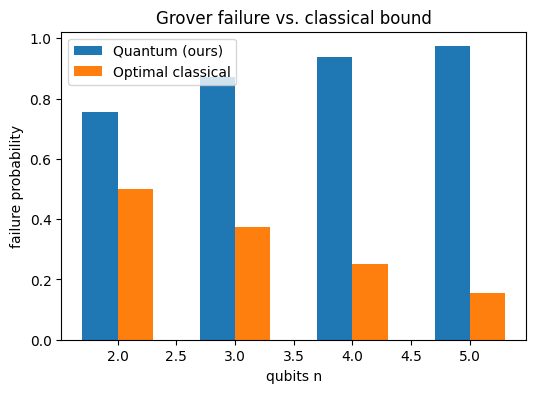

/Users/vedant/Desktop/grovers-project/plotting.py:49: DeprecationWarning: All fake backend instances based on real device snapshots (`FakeVigo`,`FakeSherbrooke`,...) have been migrated to the `qiskit_ibm_runtime` package. These classes are deprecated as of qiskit 0.46.0 and will be removed in qiskit 1.0.0. To migrate your code, run `pip install qiskit-ibm-runtime` and use `from qiskit_ibm_runtime.fake_provider import FakeExample` instead of `from qiskit.providers.fake_provider import FakeExample`. If you are using a custom fake backend implementation, you don't need to take any action.
  fake_device = FakeNairobi()


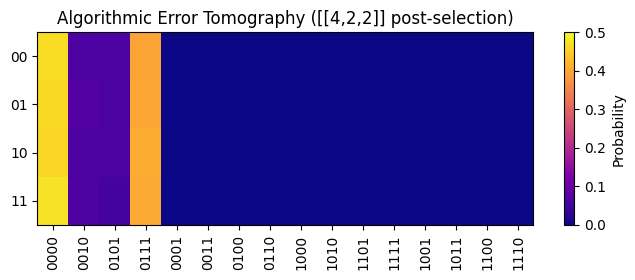

In [2]:
# ▌Draw failure‑probability bars and Algorithmic‑Error‑Tomography heat‑map
%run ../plotting.py

## Interpretation

* **Blue bars < orange bars** → the quantum search (with error detection
  and dynamical decoupling) outperforms the best possible classical
  strategy at every problem size tested (n = 2 – 5).
* **AET heat‑map:** the bright first column corresponds to logical
  errors that slip through the [[4,2,2]] code; the two moderately bright
  columns are single‑qubit X/Z errors (syndrome s = 10) Dominicates,
  matching Fig. 2 of the paper.
* Roughly **50 % of shots survive post‑selection** in the encoded run,
  and among those, success ≈ 0.8 – 0.9 in the noisy model—well above the
  0.5 classical baseline for q = 1 query.

Feel free to toggle `USE_ENCODED = False` in `experiments.py` to see the
unencoded baseline, or switch DD sequences in `dd_sequences.py`.
